In [58]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import pydataset

In [59]:
# Datasets
iris = sns.load_dataset('iris') # this one is actually in both seaborn and pydataset
swiss = pydataset.data('swiss')
insect_sprays = pydataset.data('InsectSprays')
sleep_study = pydataset.data('sleepstudy')

# Iris dataset

In [20]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### What does the distribution of petal lenghts look like?

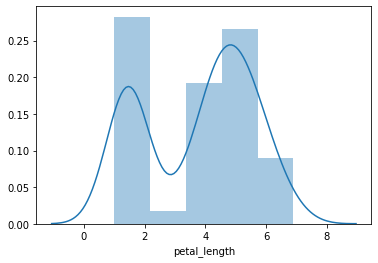

In [21]:
sns.distplot(iris.petal_length)

### Is there a correlation between petal length and petal width?

Text(1.5, 2, 'r = 0.96')

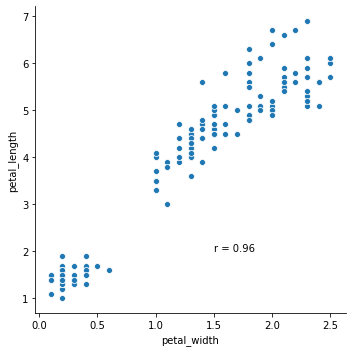

In [61]:
sns.relplot(x="petal_width", y="petal_length", data=iris)

r = iris.corr().loc['petal_length', 'petal_width']
plt.text(1.5, 2, f'r = {r:.2}')

# g = sns.pairplot(iris, vars=["petal_length", "petal_width"])

### Would it be reasonable to predict species based on sepal width and sepal length?

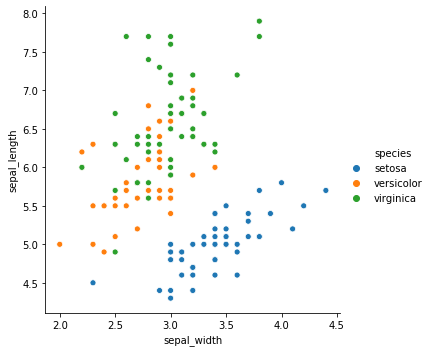

In [60]:
sns.relplot(data=iris, x='sepal_width', y='sepal_length', hue='species')

# s = sns.pairplot(iris, vars = ['sepal_width', 'sepal_length'])

### Which features would be best used to predict species?

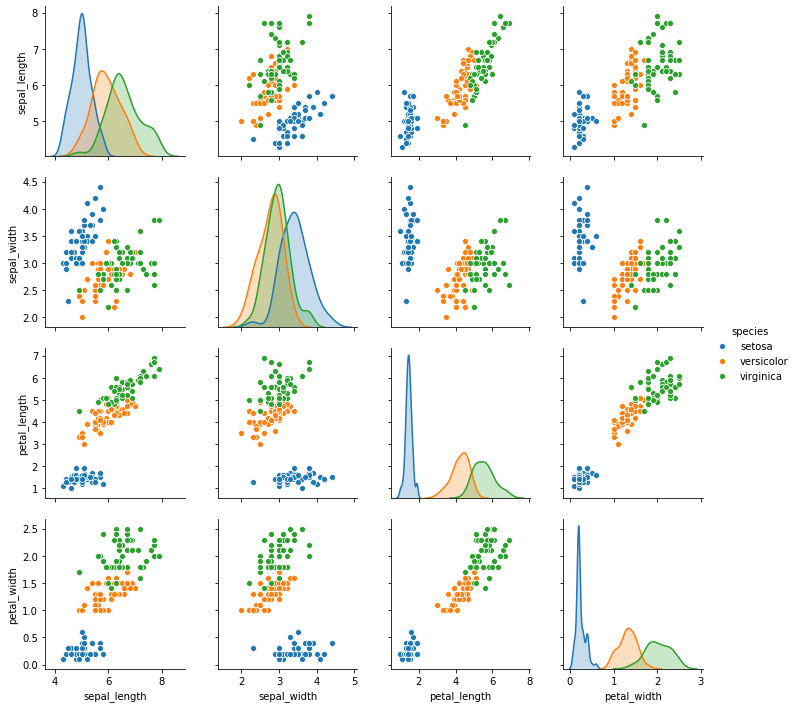

In [62]:
sns.pairplot(iris, hue="species")

# Anscombe dataset

- use pandas to group the data by the `dataset` column, and calculate summary statistics for each dataset
- What do you notice?

In [24]:
anscombe = sns.load_dataset("anscombe")
anscombe.dtypes

dataset     object
x          float64
y          float64
dtype: object

In [25]:
anscombe.groupby("dataset").mean()
anscombe.groupby("dataset").std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


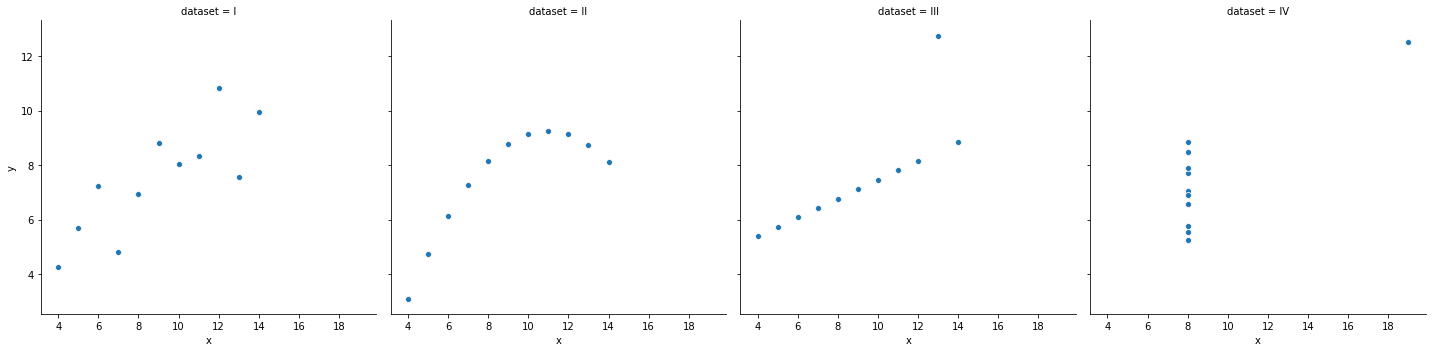

In [63]:
# 1. Plot the x and y values from the anscombe data. Each dataset should be in a separate column.
sns.relplot(x="x", y="y", col="dataset", data=anscombe)

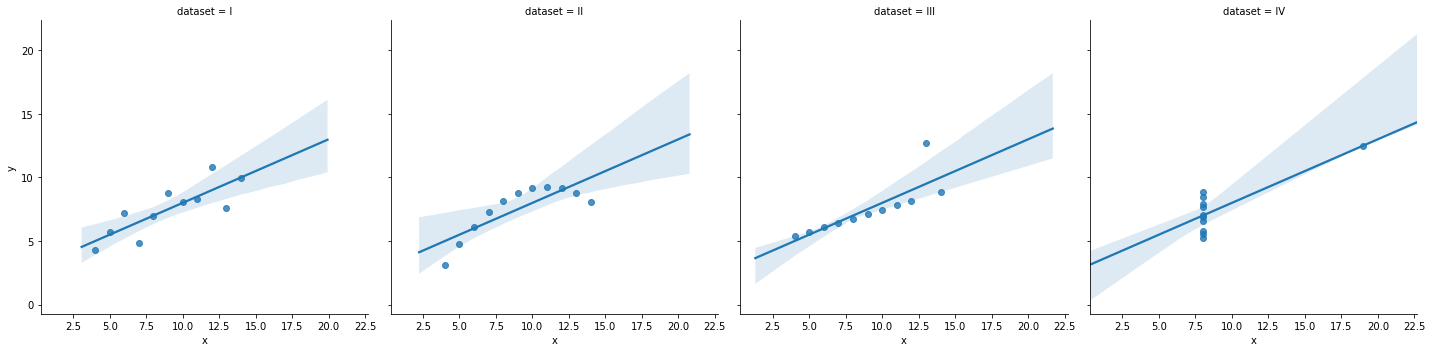

In [65]:
# Added a linear model for each dataset
sns.lmplot(x="x", y="y", col="dataset", data=anscombe)

# InsectSprays dataset

read the documentation


In [27]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [28]:
insect_sprays.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


Text(0.5, 1.0, 'Insect Spray Effectiveness')

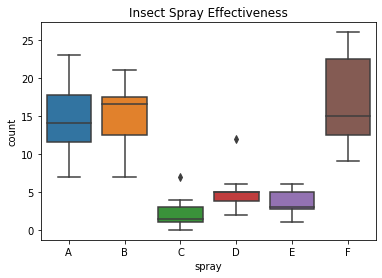

In [29]:
# create a boxplot the shows the effectivness of the different insect sprays
sns.boxplot(data=insect_sprays, x = "spray", y = "count", hue = None )
plt.title("Insect Spray Effectiveness")

# Swiss dataset
read the documentation
- create visualizations to answer the following questions

In [30]:
data('swiss', show_doc=True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [31]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


- create an atribute named `is_catholic` that holds a boolean value of whether or not the province is Catholic
- (Choose a cutoff point for what constitutes catholic)

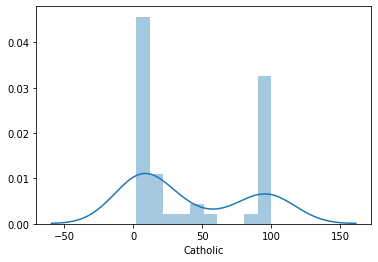

In [32]:
sns.distplot(swiss.Catholic, bins=10)

In [72]:
swiss["is_catholic"] = swiss.Catholic.apply(lambda x: "Catholic" if x >= 80 else "Not Catholic")

In [66]:
swiss.Catholic >= 80

Courtelary      False
Delemont         True
Franches-Mnt     True
Moutier         False
Neuveville      False
Porrentruy       True
Broye            True
Glane            True
Gruyere          True
Sarine           True
Veveyse          True
Aigle           False
Aubonne         False
Avenches        False
Cossonay        False
Echallens       False
Grandson        False
Lausanne        False
La Vallee       False
Lavaux          False
Morges          False
Moudon          False
Nyone           False
Orbe            False
Oron            False
Payerne         False
Paysd'enhaut    False
Rolle           False
Vevey           False
Yverdon         False
Conthey          True
Entremont        True
Herens           True
Martigwy         True
Monthey          True
St Maurice       True
Sierre           True
Sion             True
Boudry          False
La Chauxdfnd    False
Le Locle        False
Neuchatel       False
Val de Ruz      False
ValdeTravers    False
V. De Geneve    False
Rive Droit

In [67]:
swiss['is_catholic'] = swiss.Catholic >= 80
swiss.sort_values('is_catholic', ascending = False,)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True
St Maurice,65.0,75.9,9,9,99.06,17.8,True
Monthey,79.4,64.9,7,3,98.22,20.2,True
Martigwy,70.5,78.2,12,6,98.96,19.4,True
Herens,77.3,89.7,5,2,100.00,18.3,True
Delemont,83.1,45.1,6,9,84.84,22.2,True
Veveyse,87.1,64.5,14,6,98.61,24.5,True
Sierre,92.2,84.6,3,3,99.46,16.3,True
Sion,79.3,63.1,13,13,96.83,18.1,True


- Does whether or not a province is Catholic influence fetility?

In [68]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.605023
Name: Fertility, dtype: float64

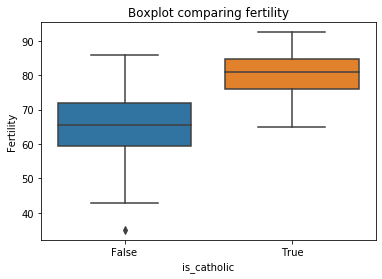

In [70]:
plt.title("Boxplot comparing fertility")
sns.boxplot(data=swiss, y="Fertility", x="is_catholic")

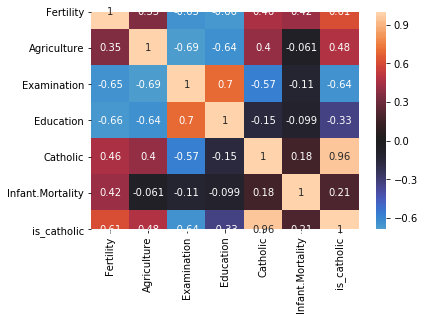

In [69]:
corr = swiss.corr()
corr
sns.heatmap(swiss.corr(), annot=True, center=0)

- what measure correlates most strongly with fertility?

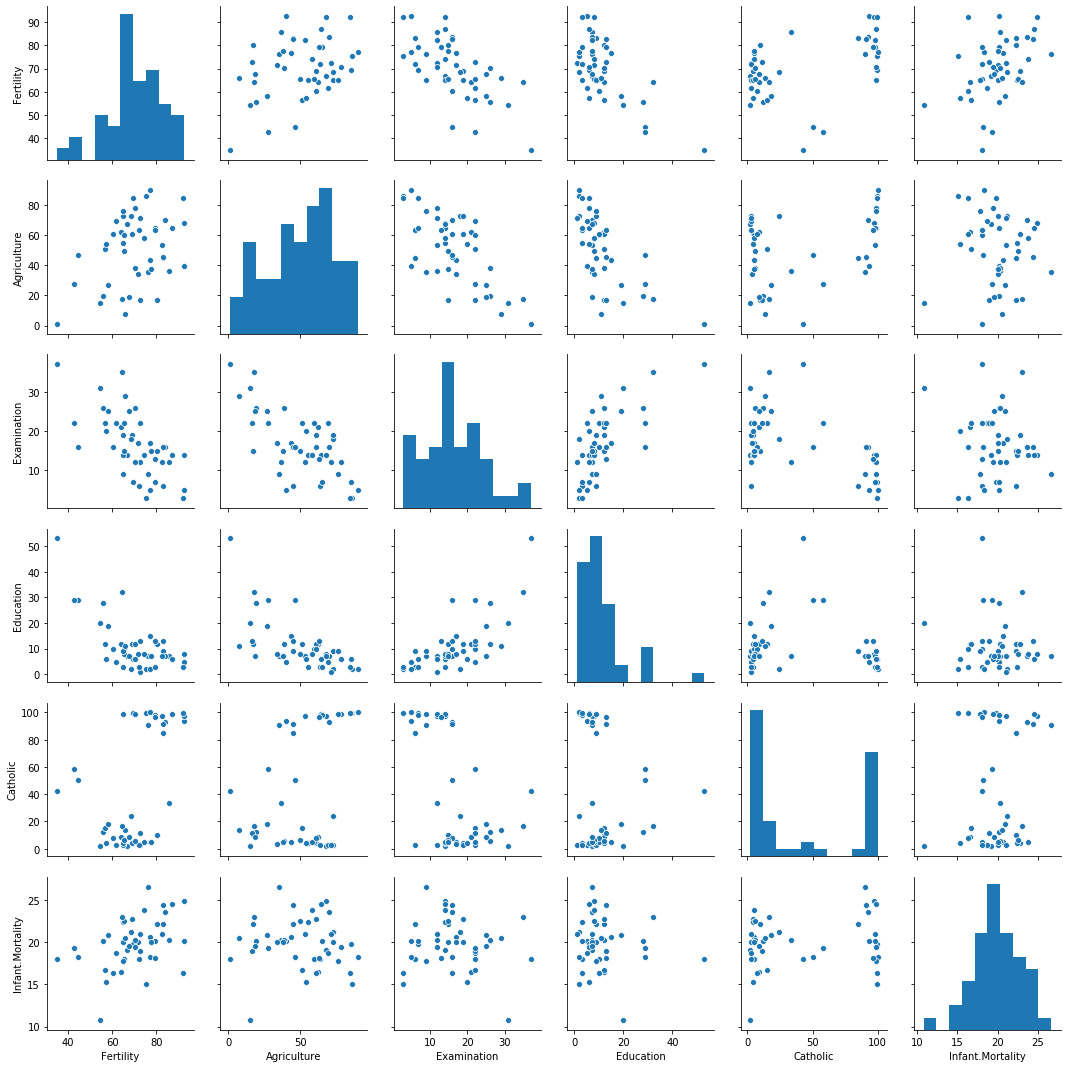

In [73]:
# What measure correlates most strongly with fertility?
# Distribution of compared values matters a great deal
sns.pairplot(swiss)

# Chipotle dataset

- create a bar chart that shows the 4 most popular items and the revenue produced by each

In [40]:
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(env.user, env.password, env.host, dbname)

In [74]:
url = get_db_url('chipotle')
query = "SELECT * FROM orders"
orders = pd.read_sql(query, url)
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [75]:
# Convert the item_price column into a float
orders.item_price = orders.item_price.str.replace('$', '').astype('float')

In [76]:
# Testing to see if the "item_price" column captures the quantity * price
chips_and_salsa = orders[orders.item_name == "Chips and Fresh Tomato Salsa"]
chips_and_salsa.sort_values("quantity", ascending=False)

,id,order_id,quantity,item_name,choice_description,item_price
3598,3599,1443,15,Chips and Fresh Tomato Salsa,nan,44.25
1257,1258,511,4,Chips and Fresh Tomato Salsa,nan,11.80
2267,2268,912,2,Chips and Fresh Tomato Salsa,nan,5.90
2729,2730,1083,2,Chips and Fresh Tomato Salsa,nan,5.90
1882,1883,759,2,Chips and Fresh Tomato Salsa,nan,5.90
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39
2910,2911,1156,1,Chips and Fresh Tomato Salsa,nan,2.39
3232,3233,1293,1,Chips and Fresh Tomato Salsa,nan,2.95
3228,3229,1291,1,Chips and Fresh Tomato Salsa,nan,2.39
3226,3227,1290,1,Chips and Fresh Tomato Salsa,nan,2.39


In [48]:
# clean up the item_price by removing the $ and converting to a float

df_chipotle["item_price"] = df_chipotle["item_price"].str.strip("$")
df_chipotle["item_price"] = df_chipotle["item_price"].astype("float")

In [49]:
# groupby item and agg quantity by count and item_price by sum

items = df_chipotle.groupby("item_name").agg({"quantity": "count", "item_price": "sum"})

# create a new column called revenue that multiples quantity times revenue
items["revenue"] = items["quantity"] * items["item_price"]

In [50]:
# sort the quantity from largest to smallest and limit to top four to show
# four most popular

four_most_popular = items.sort_values("quantity", ascending=False).head(4)
four_most_popular

,quantity,item_price,revenue
item_name,,,
Chicken Bowl,726,7342.73,5330821.98
Chicken Burrito,553,5575.82,3083428.46
Chips and Guacamole,479,2201.04,1054298.16
Steak Burrito,368,3851.43,1417326.24


In [51]:
four_most_popular = four_most_popular.reset_index()

Text(0.5, 1.0, 'Top 4 Chipotle Items')

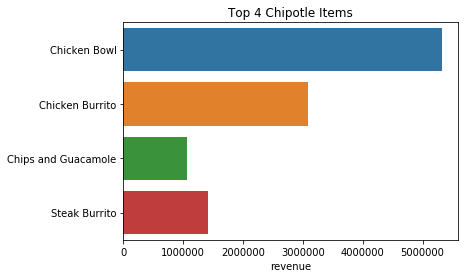

In [52]:
sns.barplot(y="item_name", x="revenue", data=four_most_popular)
plt.ylabel("")
plt.title("Top 4 Chipotle Items")

# Sleepstudy dataset
read the documentation

- create a line chart of all the individual subjects reaction times and a more prominant line showing the average change in reaction time

In [54]:
data("sleepstudy", show_doc=True)
sleepstudy = data("sleepstudy")

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [82]:
sleep = pydataset.data("sleepstudy")
sleep

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [81]:
sleep.Subject = "subject_" + sleep.Subject.astype(str)
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,subject_subject_308
2,258.7047,1,subject_subject_308
3,250.8006,2,subject_subject_308
4,321.4398,3,subject_subject_308
5,356.8519,4,subject_subject_308


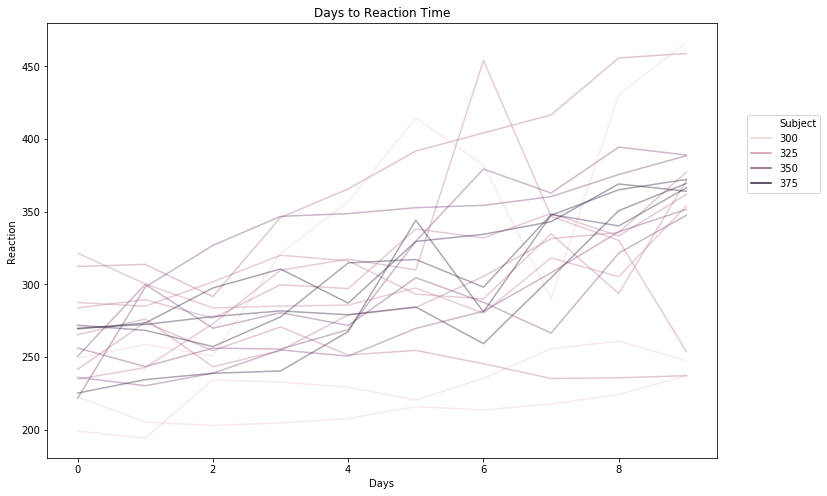

In [83]:
plt.figure(figsize=(12, 8))
plt.title("Days to Reaction Time")
sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.4)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=False, ncol=1)

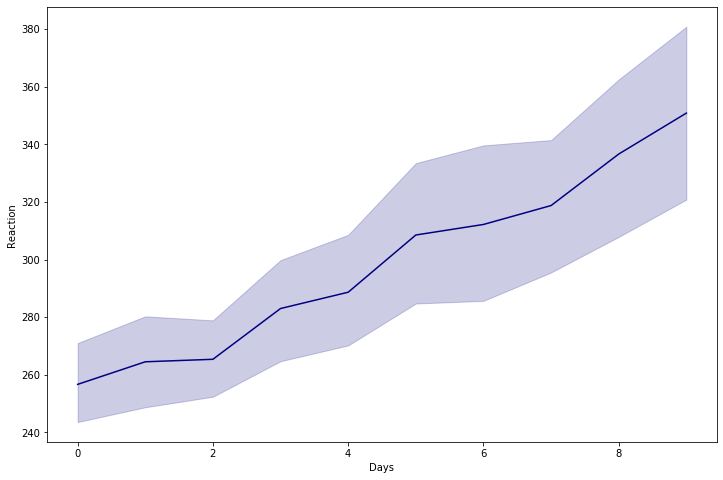

In [84]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=sleep, y='Reaction', x='Days', color='navy')

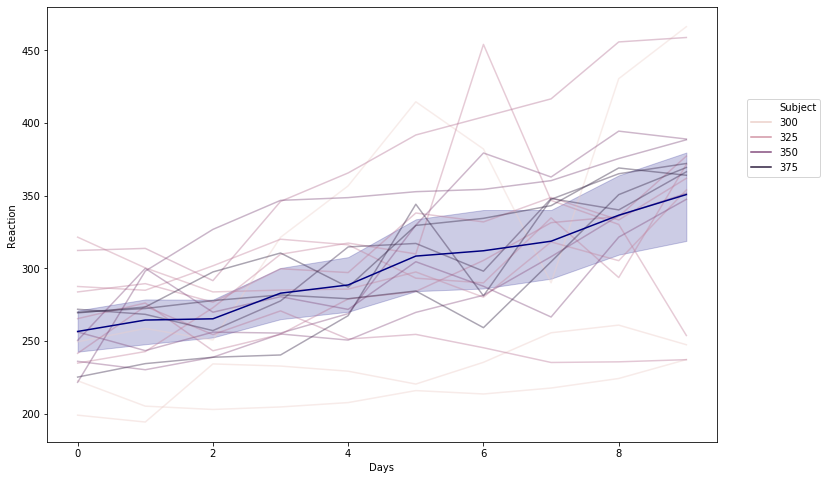

In [85]:
plt.figure(figsize=(12, 8))

sns.lineplot(data=sleep, y='Reaction', x='Days', hue='Subject', alpha=.4)
sns.lineplot(data=sleep, y='Reaction', x='Days', color='navy')

plt.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=False, ncol=1)